In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn  
# 標準正規乱数はよく使うので，randn として importしておく

# 3

In [2]:
def min_sq(x,y):  # 最小二乗法の切片と傾きを求める関数
    x_bar,y_bar=np.mean(x),np.mean(y)
    beta_1=np.dot(x-x_bar,y-y_bar)/np.linalg.norm(x-x_bar)**2
    beta_0=y_bar-beta_1*x_bar
    return  [beta_1,beta_0]

In [3]:
N=100
a=np.random.normal(loc=2,scale=1,size=N)
b=randn(1) # 切片
x=randn(N)        
y=a*x+b+randn(N)  # ここまで人工データの生成
a1,b1=min_sq(x,y)           # 回帰係数・切片
xx=x-x.mean()
yy=y-y.mean()
a2,b2=min_sq(xx,yy)         # 中心化後の回帰係数・切片

In [4]:
a1,b1

(2.0763640275278656, 0.26148264941048116)

In [5]:
a2,b2

(2.0763640275278656, 1.0844659459953503e-16)

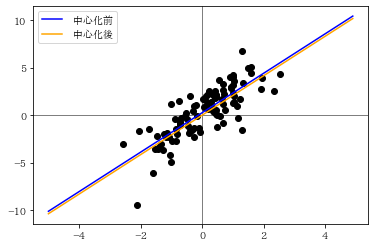

In [6]:
x_seq=np.arange(-5,5,0.1)
y_pre=x_seq*a1+b1
yy_pre=x_seq*a2+b2
plt.scatter(x,y,c="black")
plt.axhline(y=0,c="black",linewidth=0.5)
plt.axvline(x=0,c="black",linewidth=0.5)
plt.plot(x_seq,y_pre,c="blue",label=" 中心化前")
plt.plot(x_seq,yy_pre,c="orange",label=" 中心化後")
plt.legend(loc="upper left")

# 12

In [13]:
N=100
x=randn(N);y=randn(N)
beta_1,beta_0=min_sq(x,y)
RSS=np.linalg.norm(y-beta_0-beta_1*x)**2
RSE=np.sqrt(RSS/(N-1-1))
B_0=(np.linalg.norm(x)**2/N)/np.linalg.norm(x-np.mean(x))**2
B_1=1/np.linalg.norm(x-np.mean(x))**2
se_0=RSE*np.sqrt(B_0)
se_1=RSE*np.sqrt(B_1)
t_0=beta_0/se_0
t_1=beta_1/se_1
p_0=2*(1-stats.t.cdf(np.abs(t_0),N-2))
p_1=2*(1-stats.t.cdf(np.abs(t_1),N-2))
print("切片：", beta_0,se_0,t_0,p_0) # 切片
print("回帰係数", beta_1,se_1,t_1,p_1) # 回帰係数

切片： -0.048483196548781936 0.10797085052860728 -0.44903968350176265 0.6543944661242032
回帰係数 -0.028623006858035736 0.10694803159958306 -0.2676347234253101 0.7895429646666945


In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x=x.reshape(-1,1) # sklearnでは配列のサイズを明示する必要がある
y=y.reshape(-1,1) # 片方の次元を設定し, もう片方を-1にすると自動でしてくれる
reg.fit(x, y) # 実行
reg.coef_ ,reg.intercept_  # 回帰係数 beta_1, 切片 beta_0

(array([[-0.02862301]]), array([-0.0484832]))

In [15]:
import statsmodels.api as sm
X= np.insert(x, 0, 1, axis=1)
model = sm.OLS(y,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07163
Date:                Sat, 09 May 2020   Prob (F-statistic):              0.790
Time:                        22:41:36   Log-Likelihood:                -148.39
No. Observations:                 100   AIC:                             300.8
Df Residuals:                      98   BIC:                             306.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0485      0.108     -0.449      0.6

真のパラメータ：beta_0 = -0.0485, beta_1 = -0.0286<br>
sklearn.linear_model：beta_0 = -0.0485, beta_1 = -0.0286<br>
statmodels.api： beta_0 = -0.0485, beta_1 = -0.0286<br>
  
等しいのが確認できる

# 13

Text(0, 0.5, ' 確率密度')

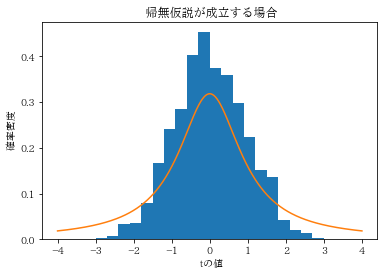

In [16]:
N=100;r=1000
T=[]
for i in range(r):
    x=randn(N);y=randn(N)
    beta_1,beta_0=min_sq(x,y)
    pre_y=beta_0+beta_1*x # yの予測値
    RSS=np.linalg.norm(y-pre_y)**2
    RSE=np.sqrt(RSS/(N-1-1))
    B_1=1/np.linalg.norm(x-np.mean(x))**2
    se_1=RSE*np.sqrt(B_1)
    T.append(beta_1/se_1)
plt.hist(T,bins=20,range=(-3,3),density=True)
x=np.linspace(-4,4,400)
plt.plot(x,stats.t.pdf(x,1))
plt.title(" 帰無仮説が成立する場合")
plt.xlabel(' tの値')
plt.ylabel(' 確率密度')

Text(0, 0.5, ' 確率密度')

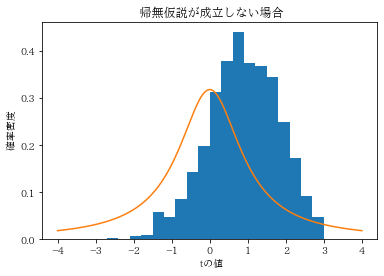

In [18]:
N=100;r=1000
T=[]
for i in range(r):
    x=randn(N);y=0.1*x+randn(N)
    beta_1,beta_0=min_sq(x,y)
    pre_y=beta_0+beta_1*x # yの予測値
    RSS=np.linalg.norm(y-pre_y)**2
    RSE=np.sqrt(RSS/(N-1-1))
    B_1=1/np.linalg.norm(x-np.mean(x))**2
    se_1=RSE*np.sqrt(B_1)
    T.append(beta_1/se_1)
plt.hist(T,bins=20,range=(-3,3),density=True)
x=np.linspace(-4,4,400)
plt.plot(x,stats.t.pdf(x,1))
plt.title(" 帰無仮説が成立しない場合")
plt.xlabel(' tの値')
plt.ylabel(' 確率密度')

上の帰無仮説が成立する場合は、回帰係数が０である帰無仮説を棄却できていないため、yをxの式で表現できているとは言えない。<br>
下の帰無仮説が成立しない場合は、回帰係数が０である帰無仮説を棄却できるため、yをxの式で表現できていると言える。

# 15

In [16]:
def R2(x,y):
    n=x.shape[0]
    xx=np.insert(x, 0, 1, axis=1)
    beta=np.linalg.inv(xx.T@xx)@xx.T@y
    y_hat=np.dot(xx,beta)
    y_bar=np.mean(y)
    RSS=np.linalg.norm(y-y_hat)**2
    TSS=np.linalg.norm(y-y_bar)**2
    return 1-RSS/TSS
N = 100
m = 1
x = randn(N, m)
y = randn(N)
print("R2 = ", format(R2(x,y)))
print(np.corrcoef(x.reshape(-1),y))

R2 =  0.0022669558679250246
[[1.         0.04761256]
 [0.04761256 1.        ]]


# 16

In [37]:
from sklearn.datasets import load_boston

boston = load_boston()
p = boston.data.shape[1]
values = []

for j in range(p):
    S = list(set(range(p)) - {j})
    r2 = R2(boston.data[:,S], boston.data[:,j])
    values.append(1/(1-r2))
values

[1.792191547433241,
 2.298758178749441,
 3.9915964183460333,
 1.0739953275537888,
 4.393719847577495,
 1.9337444357832565,
 3.1008255128153372,
 3.9559449063727263,
 7.484496335274478,
 9.00855394759707,
 1.799084049248899,
 1.3485210764063755,
 2.9414910780919357]

# 18

Text(0, 0.5, 'y')

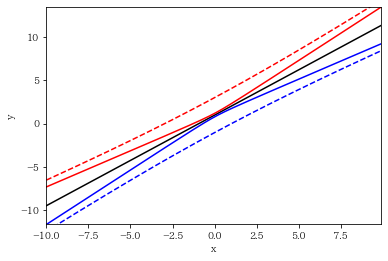

In [40]:
N=100;p=1
X=randn(N,p)
X=np.insert(X, 0, 1, axis=1)
beta=np.array([1,1])
epsilon=randn(N)
y=X@beta+epsilon
# 関数f(x),g(x)を定義
U=np.linalg.inv(X.T@X)
beta_hat=U@X.T@y
RSS=np.linalg.norm(y-X@beta_hat)**2
RSE=np.sqrt(RSS/(N-p-1))
alpha=0.05
# 信頼区間
def f(x):
    x=np.array([1,x])
    # stats.t.ppf(0.975,df=N-p-1) # 累積確率が1-alpha/2となる点
    range=stats.t.ppf(0.975,df=N-p-1)*RSE*np.sqrt(x@U@x.T)
    lower=x@beta_hat-range
    upper=x@beta_hat+range
    return ([lower,upper])

# 予測区間
def g(x):
    x=np.array([1,x])
    # stats.t.ppf(0.975,df=N-p-1) # 累積確率が1-alpha/2となる点
    range=stats.t.ppf(0.975,df=N-p-1)*RSE*np.sqrt(1+x@U@x.T)
    lower=x@beta_hat-range
    upper=x@beta_hat+range
    return ([lower,upper])

# 例
stats.t.ppf(0.975,df=1)  # 確率pに対応する点
12.706204736432095
x_seq=np.arange(-10,10,0.1)
# 信頼区間
lower_seq1=[]; upper_seq1=[]
for i in range(len(x_seq)):
    lower_seq1.append(f(x_seq[i])[0])
    upper_seq1.append(f(x_seq[i])[1])
# 予測区間
lower_seq2=[]; upper_seq2=[]
for i in range(len(x_seq)):
    lower_seq2.append(g(x_seq[i])[0])
    upper_seq2.append(g(x_seq[i])[1])
yy=beta_hat[0]+beta_hat[1]*x_seq
plt.xlim(np.min(x_seq),np.max(x_seq))
plt.ylim(np.min(lower_seq1),np.max(upper_seq1))
plt.plot(x_seq,yy,c="black")
plt.plot(x_seq,lower_seq1,c="blue")
plt.plot(x_seq,upper_seq1,c="red")
plt.plot(x_seq,lower_seq2,c="blue",linestyle="dashed")
plt.plot(x_seq,upper_seq2,c="red",linestyle="dashed")
plt.xlabel("x")
plt.ylabel("y")